In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Example 2
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= X_1+\varepsilon_y$$
$$X_2=Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The linear regression model is equivariant.

The invariant loss function is $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$.

The group action is $$gY=g(X_1+\varepsilon_1)\implies Y=X_1+\varepsilon_1+a, a\in \mathbb{R}$$
$$Y=gX_2+\varepsilon_2= X_2+b+\varepsilon_2, b\in \mathbb{R}$$

In [25]:
def risk_function1(n,sigma,a):
    list2=[]
    for i in range(1,11):
        X1=np.random.normal(0, sigma, n)+a #intervention on X1
        Y=X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)
        X=np.hstack([X1.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list2.append(sum((y-pred)**2)/n) 
    return sum(list2)/10

In [26]:
def risk_function2(n,sigma,a):
    list2=[]
    for i in range(1,11):
        X1=np.random.normal(0, sigma, n)
        Y=X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)+b #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list2.append(sum((y-pred)**2)/n) 
    return sum(list2)/10

$$\sigma=1$$

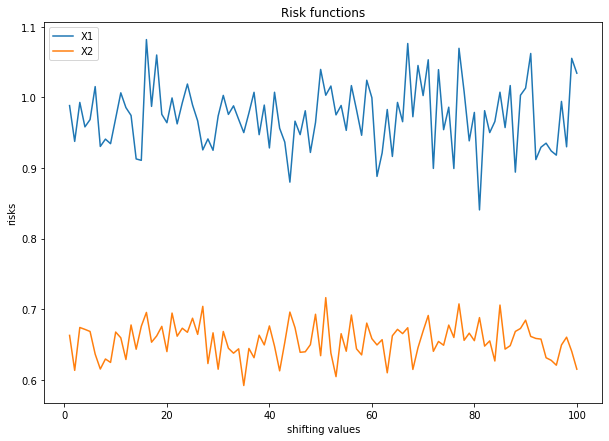

In [27]:
list1=[]
list2=[]


for a in range(100): #different environments on 
    list1.append(risk_function1(100,1,a))
    
   
for b in range(100):
    list2.append(risk_function2(100,1,-b))
    
    
    
plt.figure(figsize=(10,7))
   
plt.plot(range(1,101),list1,label='X1')
plt.plot(range(1,101),list2,label='X2')
plt.xlabel("shifting values")
plt.ylabel("risks")

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

$$\sigma=5$$

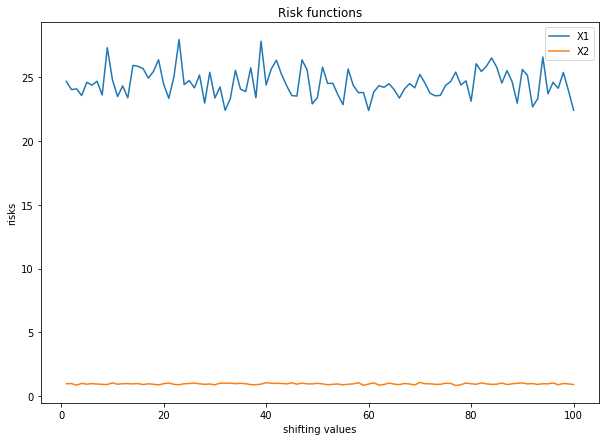

In [29]:
list1=[]
list2=[]


for a in range(100): #different environments on 
    list1.append(risk_function1(100,5,a))
    
   
for b in range(100):
    list2.append(risk_function2(100,5,-b))
    
    
    
plt.figure(figsize=(10,7))
   
plt.plot(range(1,101),list1,label='X1')
plt.plot(range(1,101),list2,label='X2')
plt.xlabel("shifting values")
plt.ylabel("risks")

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()